In [91]:


import pandas as pd
import mysql
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


In [57]:
import mysql
from mysql.connector import MySQLConnection, Error
import pandas as pd
import time



df = pd.DataFrame()
def query_with_fetchall():
    try:
        connection = mysql.connector.connect(user='brett', 
                                             password='BrettTully#2023',
                                             host='r2klabs.com',
                                             database='sensor')
        cursor = connection.cursor()
        cursor.execute("SELECT * FROM rpisense order by sensor_date DESC;")
        rows = cursor.fetchall()
        print('Total Row(s):', cursor.rowcount)
         #only print head
        title = [i[0] for i in cursor.description]
        print(title)
        #for row in rows:
         #   print(row)
        global df
        df = pd.DataFrame(rows)
        df['time'] = df[1].dt.time
#        df['time'] = time.strftime("%I:%M %p")
        df['weekday'] = df[1].dt.weekday
        df['date'] = df[1].dt.date
        #days = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
        #df['weekday'] = df['weekday'].apply(lambda x: days[x])
     
        

    except Error as e:
        print(e)

    finally:
        cursor.close()
        connection.close()

query_with_fetchall()
df.rename(columns={0:"Device",1:"Datetime",2:"Temp F",3:"Humidity","time":"Time","weekday":"Weekday","date":"Date"},inplace=True)
df

Total Row(s): 1342903
['device', 'sensor_date', 'temp', 'humidity']


,Device,Datetime,Temp F,Humidity,Time,Weekday,Date
0,P002,2023-03-29 16:56:07,65.30,46.0,16:56:07,2,2023-03-29
1,P004,2023-03-29 16:56:06,67.46,31.8,16:56:06,2,2023-03-29
2,P002,2023-03-29 16:56:05,65.30,46.0,16:56:05,2,2023-03-29
3,P006B,2023-03-29 16:56:05,65.48,33.8,16:56:05,2,2023-03-29
4,P004,2023-03-29 16:56:04,67.64,31.8,16:56:04,2,2023-03-29
...,...,...,...,...,...,...,...
1342898,P002,2023-03-16 13:48:57,65.48,51.4,13:48:57,3,2023-03-16
1342899,P002,2023-03-16 13:48:54,65.48,51.4,13:48:54,3,2023-03-16
1342900,P002,2023-03-16 13:48:52,65.48,49.8,13:48:52,3,2023-03-16
1342901,P002,2023-03-16 13:47:38,65.48,49.7,13:47:38,3,2023-03-16


import datetime

# Dictionary of occupied times for each classroom and day of the week
occupied_times = {
    "P002": {
        "Monday": ["08:00:00", "10:00:00", "12:00:00",("13:00:00","13:50:00"), "14:00:00", "16:00:00"],
        "Tuesday": ["09:00:00", "11:00:00", "13:00:00", "15:00:00", "17:00:00"],
        "Wednesday": ["10:00:00", "12:00:00",("13:00:00","13:50:00"), "14:00:00", "16:00:00", "18:00:00"],
        "Thursday": ["11:00:00", ("13:40:00","15:40:00"), "15:00:00", "17:00:00", "19:00:00"],
        "Friday": ["12:00:00", "14:00:00", "16:00:00", "18:00:00", "20:00:00"]
    },
    "P004": {
        "Monday": ["09:00:00", "11:00:00", "13:00:00", "15:00:00", "17:00:00"],
        "Tuesday": ["10:00:00", "12:00:00", "14:00:00", "16:00:00", "18:00:00"],
        "Wednesday": ["11:00:00", "13:00:00", "15:00:00", "17:00:00", "19:00:00"],
        "Thursday": ["12:00:00", "14:00:00", "16:00:00", "18:00:00", "20:00:00"],
        "Friday": ["13:00:00", "15:00:00", "17:00:00", "19:00:00", "21:00:00"]
    }
    "P006B": {
        "Monday": ["09:00:00", "11:00:00", "13:00:00", "15:00:00", "17:00:00"],
        "Tuesday": ["10:00:00", "12:00:00", "14:00:00", "16:00:00", "18:00:00"],
        "Wednesday": ["11:00:00", "13:00:00", "15:00:00", "17:00:00", "19:00:00"],
        "Thursday": ["12:00:00", "14:00:00", "16:00:00", "18:00:00", "20:00:00"],
        "Friday": ["13:00:00", "15:00:00", "17:00:00", "19:00:00", "21:00:00"]
    }
}

# Get the current day of the week, time, and classroom number
now = datetime.datetime.now()
day_of_week = now.strftime("%A")
time = now.strftime("%H:%M:%S")
classroom_number = "101"  # Replace with the classroom number you want to check

# Check if the current time and day of the week is in the list of occupied times for the classroom
is_occupied = False
if classroom_number in occupied_times:
    if day_of_week in occupied_times[classroom_number]:
        is_occupied = time in occupied_times[classroom_number][day_of_week]

# Print the result
print(f"The classroom {classroom_number} is occupied:", is_occupied)

# Exploratory Data Analysis

# Data Types

In [58]:
df.dtypes

Device              object
Datetime    datetime64[ns]
Temp F             float64
Humidity           float64
Time                object
Weekday              int64
Date                object
dtype: object

# Summary Statistics

In [59]:
# I have to use a lambda function as my statistics would come in as scientific notation normally
df["Temp F"].describe().apply(lambda x: format(x, 'f'))

count    1342903.000000
mean          66.930221
std            4.890894
min           -4.180000
25%           65.660000
50%           67.100000
75%           68.360000
max         3005.420000
Name: Temp F, dtype: object

In [60]:
df["Humidity"].describe().apply(lambda x: format(x, 'f'))

count    1342903.000000
mean          42.277368
std           12.900072
min            1.400000
25%           32.900000
50%           41.100000
75%           50.000000
max           84.700000
Name: Humidity, dtype: object

# Categorical Variable Proportions

In [61]:
df['Device'].value_counts()

P004     468379
P002     437659
P006B    436865
Name: Device, dtype: int64

# Correlation Table

In [62]:
corr_table = df.corr()

corr_table

,Temp F,Humidity,Weekday
Temp F,1.000000,-0.060589,0.034679
Humidity,-0.060589,1.000000,-0.006124
Weekday,0.034679,-0.006124,1.000000


[Text(0.5, 1.0, 'Heatmap of Temp F and Humidity')]

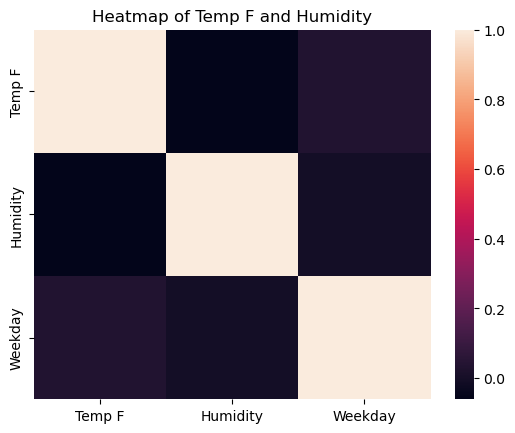

In [66]:
sns.heatmap(corr_table).set(title='Heatmap of Temp F and Humidity')

In [70]:
days = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
df['Weekday'] = df['Weekday'].apply(lambda x: days[x])

(0.0, 100.0)

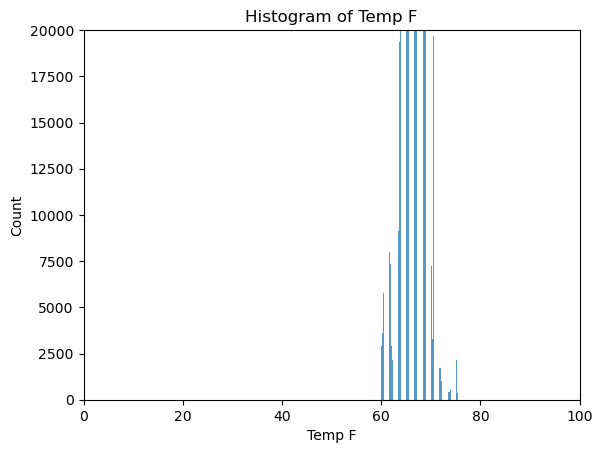

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data=df, x="Temp F").set(title='Histogram of Temp F')
plt.ylim(0,20000)
plt.xlim(0, 100)

[Text(0.5, 1.0, 'Histogram of Humidity')]

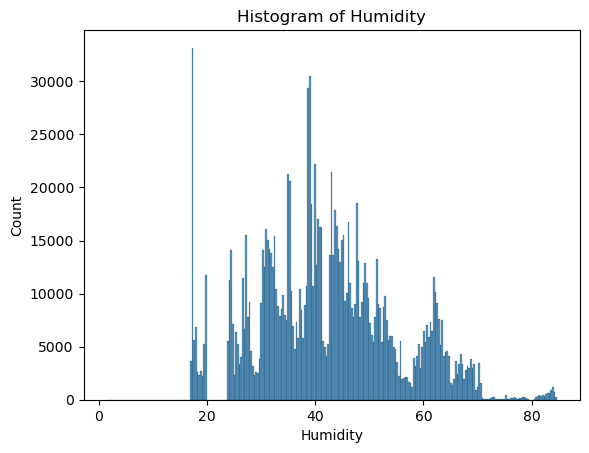

In [72]:
sns.histplot(data=df, x="Humidity").set(title='Histogram of Humidity')

(0.0, 100.0)

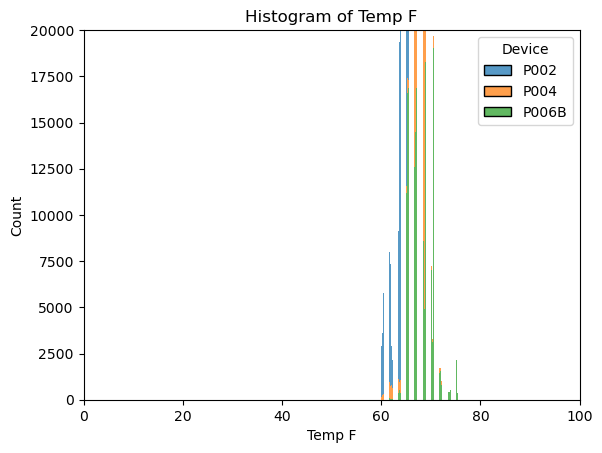

In [73]:
sns.histplot(data=df, x="Temp F", hue="Device", multiple="stack").set(title='Histogram of Temp F')
plt.ylim(0,20000)
plt.xlim(0, 100)

(0.0, 100.0)

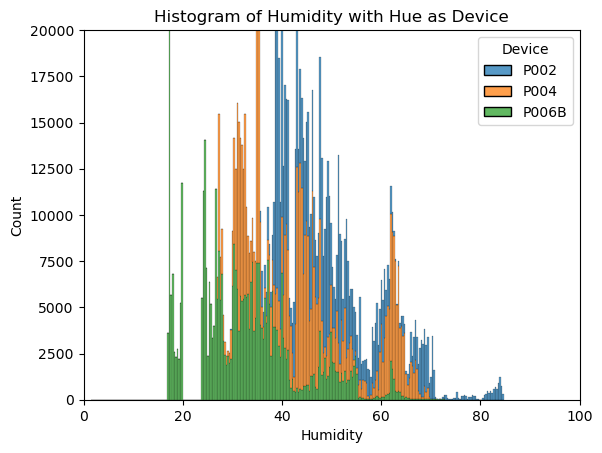

In [74]:
sns.histplot(data=df, x="Humidity", hue="Device", multiple="stack").set(title='Histogram of Humidity with Hue as Device')
plt.ylim(0,20000)
plt.xlim(0, 100)

[Text(0.5, 1.0, 'Histogram of Humidity with Hue as Weekday')]

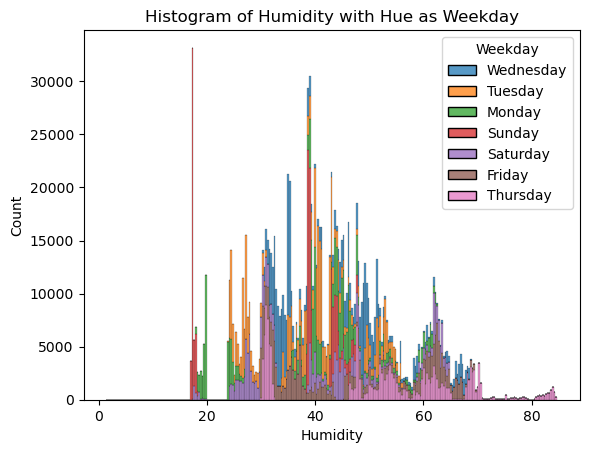

In [75]:
sns.histplot(data=df, x="Humidity", hue="Weekday", multiple="stack").set(title='Histogram of Humidity with Hue as Weekday')

[Text(0.5, 1.0, 'Histogram of Humidity with Hue as Device')]

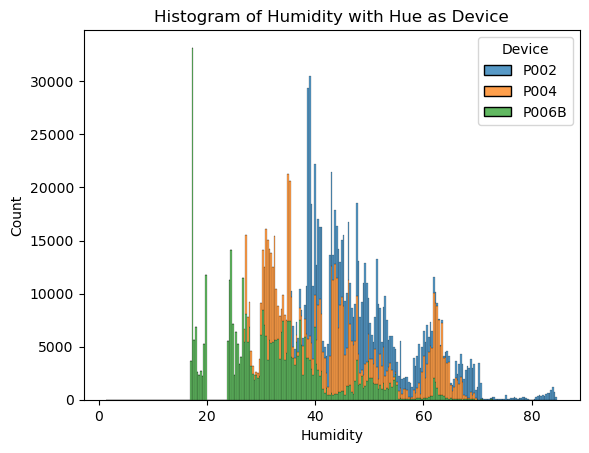

In [81]:
sns.histplot(data=df, x="Humidity", hue="Device", multiple="stack").set(title='Histogram of Humidity with Hue as Device')

[Text(0.5, 1.0, 'Line Plot of Temp F with Hue as Device')]

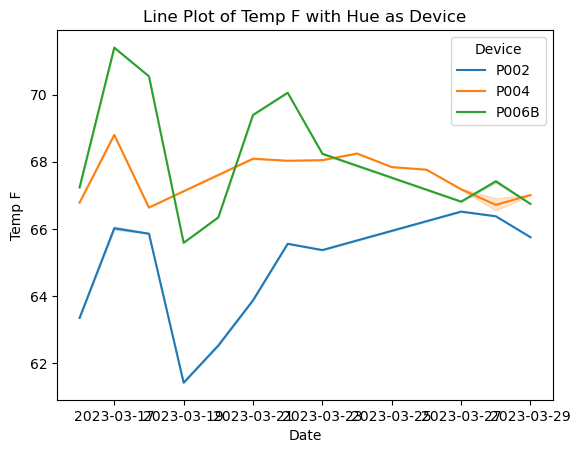

In [76]:
sns.lineplot(data=df, x="Date", y="Temp F",hue='Device').set(title='Line Plot of Temp F with Hue as Device')

[Text(0.5, 1.0, 'Line Plot of Humidity with Hue as Device')]

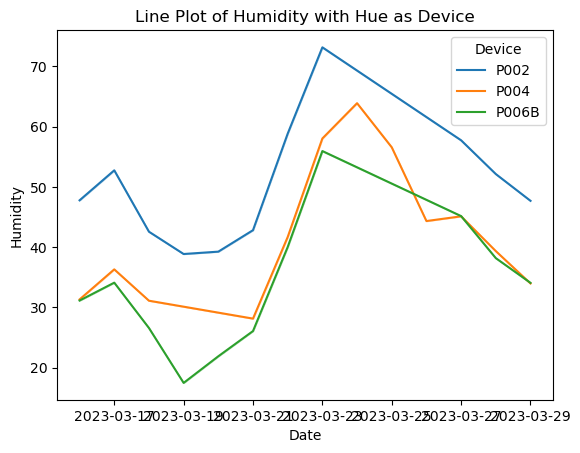

In [77]:
sns.lineplot(data=df, x="Date", y="Humidity",hue='Device').set(title='Line Plot of Humidity with Hue as Device')

[Text(0.5, 1.0, 'Scatterplot of Humidity and Temp F')]

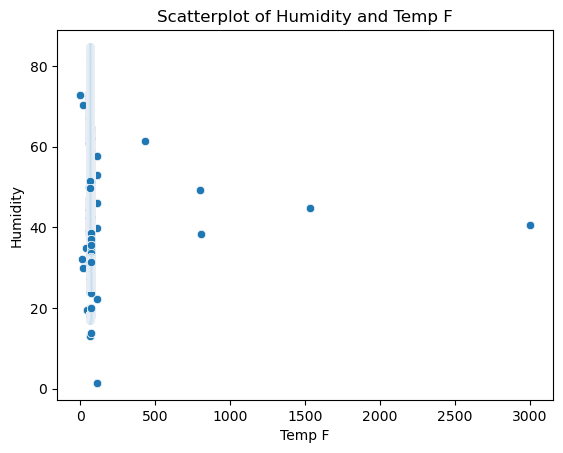

In [78]:
sns.scatterplot(data=df, x="Temp F", y="Humidity").set(title='Scatterplot of Humidity and Temp F')


(0.0, 100.0)

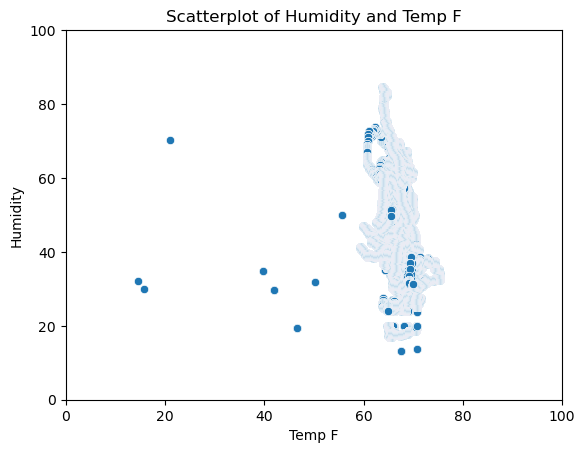

In [79]:
sns.scatterplot(data=df, x="Temp F", y="Humidity").set(title='Scatterplot of Humidity and Temp F')
plt.xlim(0,100)
plt.ylim(0, 100)

[Text(0.5, 1.0, 'Boxplot of Humidity/Weekday with Hue as Device')]

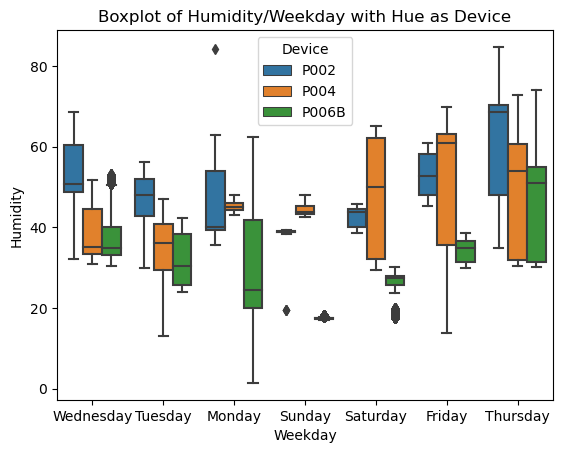

In [80]:

sns.boxplot(data=df, x="Weekday", y="Humidity",hue="Device").set(title='Boxplot of Humidity/Weekday with Hue as Device')

[Text(0.5, 1.0, 'Boxplot of Humidity/Weekday')]

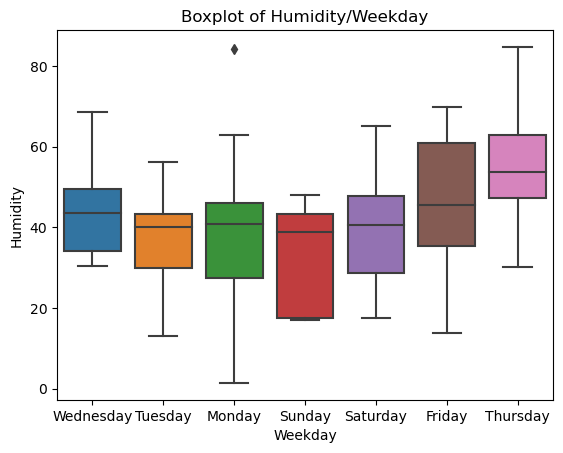

In [82]:
sns.boxplot(data=df, x="Weekday", y="Humidity").set(title='Boxplot of Humidity/Weekday')

[Text(0.5, 1.0, 'Boxplot of Humidity/Device')]

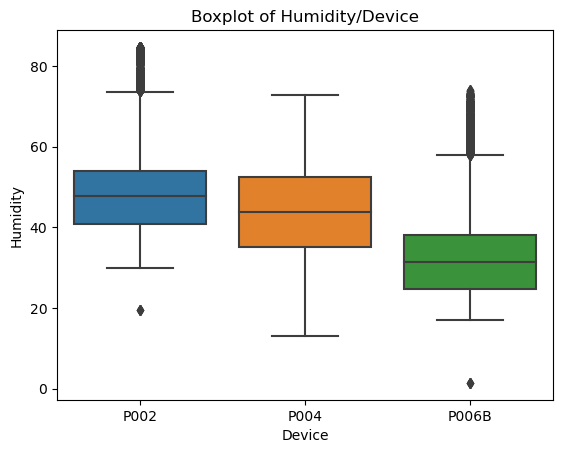

In [83]:
sns.boxplot(data=df, x="Device", y="Humidity").set(title='Boxplot of Humidity/Device')

[Text(0.5, 1.0, 'Boxplot of Humidity/Device with hue as Weekday')]

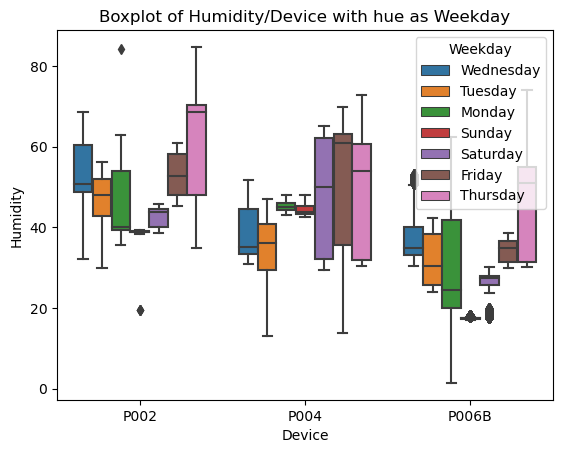

In [84]:
sns.boxplot(data=df, x="Device", y="Humidity",hue="Weekday").set(title='Boxplot of Humidity/Device with hue as Weekday')

[Text(0.5, 1.0, 'Boxplot of Humidity/Device')]

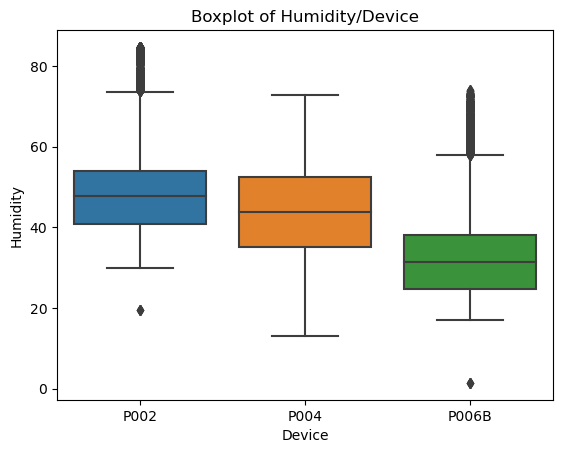

In [85]:
sns.boxplot(data=df, x="Device", y="Humidity").set(title='Boxplot of Humidity/Device')

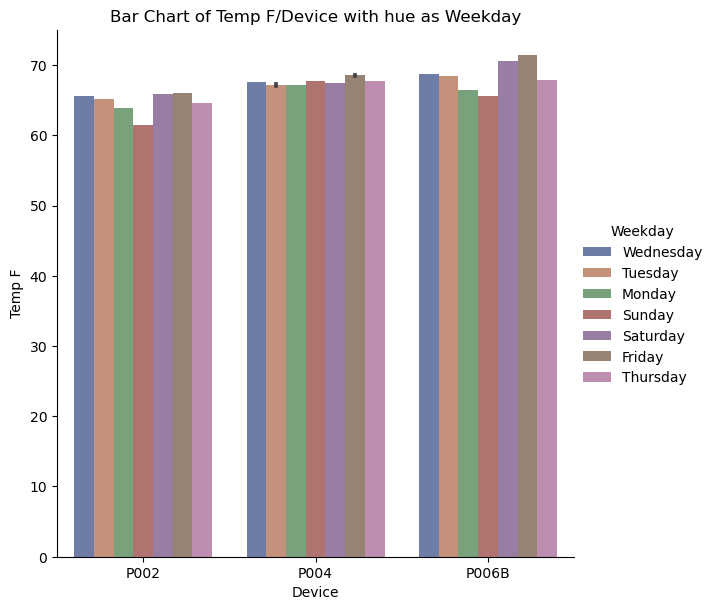

In [86]:
sns.catplot(
    data=df, kind="bar",
    x="Device", y="Temp F", hue="Weekday",palette="dark", alpha=.6, height=6).set(title='Bar Chart of Temp F/Device with hue as Weekday')

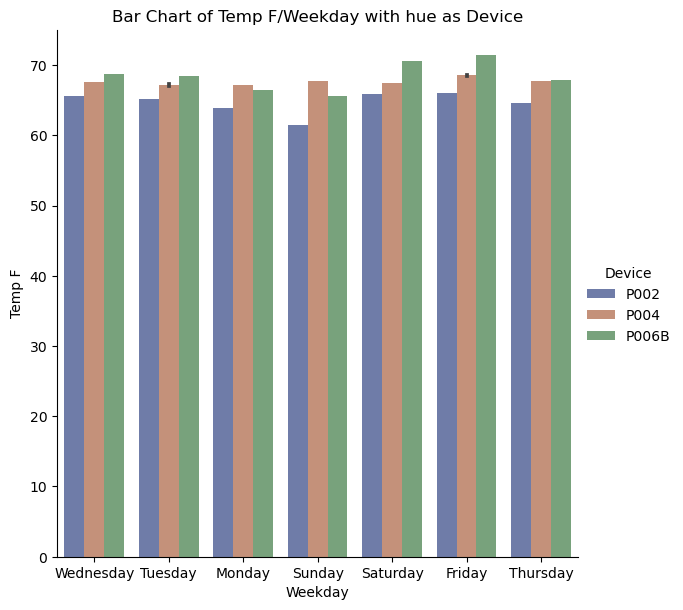

In [87]:
sns.catplot(
    data=df, kind="bar",
    x="Weekday", y="Temp F", hue="Device",palette="dark", alpha=.6, height=6
).set(title='Bar Chart of Temp F/Weekday with hue as Device')

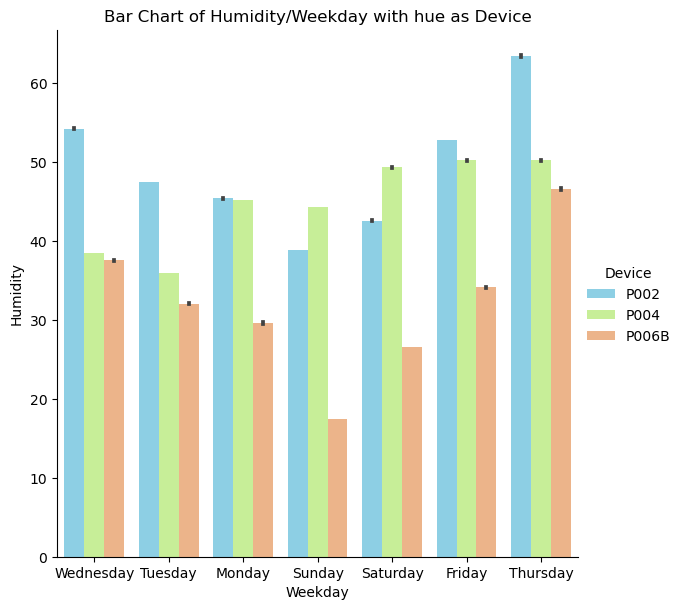

In [88]:
sns.catplot(
    data=df, kind="bar",
    x="Weekday", y="Humidity", hue="Device",palette="turbo", alpha=.6, height=6).set(title='Bar Chart of Humidity/Weekday with hue as Device')

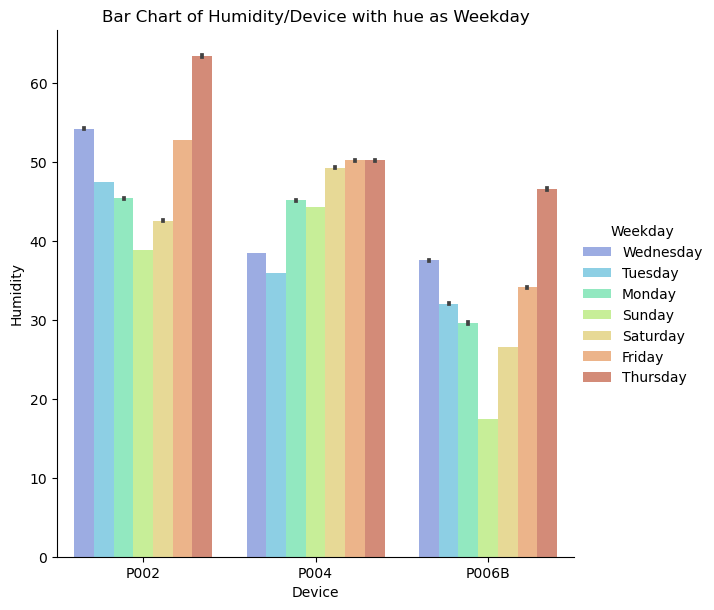

In [89]:
sns.catplot(
    data=df, kind="bar",
    x="Device", y="Humidity", hue="Weekday",palette="turbo", alpha=.6, height=6
).set(title='Bar Chart of Humidity/Device with hue as Weekday')

In [ ]:
import datetime

# Dictionary of occupied times for each classroom and day of the week
occupied_times = {
    "P002": {
        "Monday": [("09:00:00","09:50:00"),("10:00:00","10:50:00") ,("13:00:00","13:50:00")],
        "Tuesday": ["09:00:00", "11:00:00",("12:15:00","13:30:00")],
        "Wednesday": [("09:00:00","9:50:00"),("10:00:00","10:50:00"), ("13:00:00","13:50:00")],
        "Thursday": ["11:00:00",("12:15:00","13:30:00"), ("13:40:00","15:40:00")],
        "Friday": [("09:00:00","09:50:00"),("10:00:00","10:50:00")]
    },
    "P004": {
        "Monday": [("09:00:00","09:50:00"),("10:00:00","10:50:00")],
        "Tuesday": [("08:40:00","10:40:00"),("12:15:00", "13:30:00"), ("13:40:00","14:50:00")],
        "Wednesday": [("09:00:00","09:50:00"),("10:00:00","10:50:00")],
        "Thursday": [("08:40:00","10:40:00"),("12:15:00", "13:30:00"),("13:40:00","14:50:00")],
        "Friday": [("09:00:00","09:50:00"),("10:00:00","10:50:00")]
    },
    "P006B": {
        "Monday": [("10:00:00", "12:00:00")],
        "Tuesday": [("10:00:00", "12:00:00")],
        "Wednesday": [("10:00:00", "12:00:00")],
        "Thursday": [("10:00:00", "12:00:00")],
        "Friday": [("10:00:00", "12:00:00")]
    }
}

# Get the current day of the week, time, and classroom number
#now# = datetime.datetime.now()
#day_of_week = now.strftime("%A")
#time = now.strftime("%H:%M:%S")
#classroom_number = "P004"  # Replace with the classroom number you want to check

current_time = datetime.datetime.now().strftime("%H:%M:%S")

for classroom, weekday, occupancy in occupied_times.items():
    occupied = False
    for start, end in occupancy:
        if start <= current_time <= end:
            occupied = True
            break
            if occupied:
                print(f"{classroom} is currently occupied.")
            else:
                    print(f"{classroom} is currently unoccupied.")

# Check if the current time and day of the week is in the list of occupied times for the classroom
#is_occupied = False
#if classroom_number in occupied_times:
 #   if day_of_week in occupied_times[classroom_number]:
  #      is_occupied = time in occupied_times[classroom_number][day_of_week]

# Print the result
#print(f"The classroom {classroom_number} is occupied:", is_occupied)

classroom_occupancy = {
    "Classroom A": ["08:00", "10:30", "12:45", "14:15"],
    "Classroom B": ["09:00", "11:30", "13:45", "15:15"],
    "Classroom C": ["08:30", "11:00", "13:15", "14:45"]
}

current_time = datetime.datetime.now().strftime("%H:%M")

for classroom, occupancy in classroom_occupancy.items():
    if current_time in occupancy:
        print(f"{classroom} is currently occupied.")
    else:
        print(f"{classroom} is currently unoccupied.")

class_schedule = {
    "P002": {
        "Monday": [("09:00:00","09:50:00"),("10:00:00","10:50:00") ,("13:00:00","13:50:00")],
        "Tuesday": ["09:00:00", "11:00:00",("12:15:00","13:30:00")],
        "Wednesday": [("09:00:00","9:50:00"),("10:00:00","10:50:00"), ("13:00:00","13:50:00")],
        "Thursday": ["11:00:00",("12:15:00","13:30:00"), ("13:40:00","15:40:00")],
        "Friday": [("09:00:00","09:50:00"),("10:00:00","10:50:00")]
    },
    "P004": {
        "Monday": [("09:00:00","09:50:00"),("10:00:00","10:50:00")],
        "Tuesday": [("08:40:00","10:40:00"),("12:15:00", "13:30:00"), ("13:40:00","14:50:00")],
        "Wednesday": [("09:00:00","09:50:00"),("10:00:00","10:50:00")],
        "Thursday": [("08:40:00","10:40:00"),("12:15:00", "13:30:00"),("13:40:00","14:50:00")],
        "Friday": [("09:00:00","09:50:00"),("10:00:00","10:50:00")]
    },
    "P006B": {
        "Monday": [("10:00:00", "12:00:00")],
        "Tuesday": [("10:00:00", "12:00:00")],
        "Wednesday": [("10:00:00", "12:00:00")],
        "Thursday": [("10:00:00", "12:00:00")],
        "Friday": [("10:00:00", "12:00:00")]
    }
}

class_schedule.values()

In [92]:
import pandas as pd
import datetime

# Example class schedule dictionary

class_schedule = {
    "P002": {
        "Monday": [("09:00:00","09:50:00"),("10:00:00","10:50:00") ,("13:00:00","13:50:00")],
        "Tuesday": ["09:00:00", "11:00:00",("12:15:00","13:30:00")],
        "Wednesday": [("09:00:00","9:50:00"),("10:00:00","10:50:00"), ("13:00:00","13:50:00")],
        "Thursday": ["11:00:00",("12:15:00","13:30:00"), ("13:40:00","15:40:00")],
        "Friday": [("09:00:00","09:50:00"),("10:00:00","10:50:00")]
    },
    "P004": {
        "Monday": [("09:00:00","09:50:00"),("10:00:00","10:50:00")],
        "Tuesday": [("08:40:00","10:40:00"),("12:15:00", "13:30:00"), ("13:40:00","14:50:00")],
        "Wednesday": [("09:00:00","09:50:00"),("10:00:00","10:50:00")],
        "Thursday": [("08:40:00","10:40:00"),("12:15:00", "13:30:00"),("13:40:00","14:50:00")],
        "Friday": [("09:00:00","09:50:00"),("10:00:00","10:50:00")]
    },
    "P006B": {
        "Monday": [("10:00:00", "12:00:00")],
        "Tuesday": [("10:00:00", "12:00:00")],
        "Wednesday": [("10:00:00", "12:00:00")],
        "Thursday": [("10:00:00", "12:00:00")],
        "Friday": [("10:00:00", "12:00:00")]
    }
}







# live dataset as a Pandas DataFrame
live_dataset = df
# Loop through each row in the live dataset
for index, row in df.iterrows():
    timestamp_str = row["Datetime"].strftime("%Y-%m-%d %H:%M:%S")
    timestamp = datetime.datetime.strptime(timestamp_str, "%Y-%m-%d %H:%M:%S")
    day_of_week = timestamp.strftime("%A") # Get the day of the week as a string
    time_str = timestamp.strftime("%H:%M:%S") # Get the time as a string
    
    # Loop through each classroom in the class schedule dictionary
    for classroom, schedule in class_schedule.items():
        # Check if the current day of the week is in the schedule for the current classroom
        if day_of_week in class_schedule:
            # Get the start and end times for the current day of the week for the current classroom
            start_time_str, end_time_str = class_schedule[day_of_week]
            start_time = datetime.datetime.strptime(start_time_str, "%H:%M:%S")
            end_time = datetime.datetime.strptime(end_time_str, "%H:%M:%S")
            
            # Check if the current timestamp is between the start and end times for the current class
            if start_time <= timestamp <= end_time:
                print(f"The {classroom} is currently meeting on {day_of_week} from {start_time_str} to {end_time_str}.")
                break
    else:
        print(f"No class is meeting at the moment for the timestamp {timestamp_str}.")

No class is meeting at the moment for the timestamp 2023-03-29 16:56:07.
No class is meeting at the moment for the timestamp 2023-03-29 16:56:06.
No class is meeting at the moment for the timestamp 2023-03-29 16:56:05.
No class is meeting at the moment for the timestamp 2023-03-29 16:56:05.
No class is meeting at the moment for the timestamp 2023-03-29 16:56:04.
No class is meeting at the moment for the timestamp 2023-03-29 16:56:03.
No class is meeting at the moment for the timestamp 2023-03-29 16:56:03.
No class is meeting at the moment for the timestamp 2023-03-29 16:56:03.
No class is meeting at the moment for the timestamp 2023-03-29 16:56:01.
No class is meeting at the moment for the timestamp 2023-03-29 16:56:01.
No class is meeting at the moment for the timestamp 2023-03-29 16:56:01.
No class is meeting at the moment for the timestamp 2023-03-29 16:56:00.
No class is meeting at the moment for the timestamp 2023-03-29 16:55:59.
No class is meeting at the moment for the timestamp

No class is meeting at the moment for the timestamp 2023-03-29 15:16:42.
No class is meeting at the moment for the timestamp 2023-03-29 15:16:41.
No class is meeting at the moment for the timestamp 2023-03-29 15:16:41.
No class is meeting at the moment for the timestamp 2023-03-29 15:16:40.
No class is meeting at the moment for the timestamp 2023-03-29 15:16:39.
No class is meeting at the moment for the timestamp 2023-03-29 15:16:39.
No class is meeting at the moment for the timestamp 2023-03-29 15:16:38.
No class is meeting at the moment for the timestamp 2023-03-29 15:16:37.
No class is meeting at the moment for the timestamp 2023-03-29 15:16:37.
No class is meeting at the moment for the timestamp 2023-03-29 15:16:36.
No class is meeting at the moment for the timestamp 2023-03-29 15:16:35.
No class is meeting at the moment for the timestamp 2023-03-29 15:16:35.
No class is meeting at the moment for the timestamp 2023-03-29 15:16:34.
No class is meeting at the moment for the timestamp

No class is meeting at the moment for the timestamp 2023-03-29 13:25:19.
No class is meeting at the moment for the timestamp 2023-03-29 13:25:18.
No class is meeting at the moment for the timestamp 2023-03-29 13:25:17.
No class is meeting at the moment for the timestamp 2023-03-29 13:25:17.
No class is meeting at the moment for the timestamp 2023-03-29 13:25:16.
No class is meeting at the moment for the timestamp 2023-03-29 13:25:15.
No class is meeting at the moment for the timestamp 2023-03-29 13:25:15.
No class is meeting at the moment for the timestamp 2023-03-29 13:25:15.
No class is meeting at the moment for the timestamp 2023-03-29 13:25:14.
No class is meeting at the moment for the timestamp 2023-03-29 13:25:13.
No class is meeting at the moment for the timestamp 2023-03-29 13:25:13.
No class is meeting at the moment for the timestamp 2023-03-29 13:25:12.
No class is meeting at the moment for the timestamp 2023-03-29 13:25:11.
No class is meeting at the moment for the timestamp

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



KeyboardInterrupt: 

In [93]:
df

,Device,Datetime,Temp F,Humidity,Time,Weekday,Date
0,P002,2023-03-29 16:56:07,65.30,46.0,16:56:07,Wednesday,2023-03-29
1,P004,2023-03-29 16:56:06,67.46,31.8,16:56:06,Wednesday,2023-03-29
2,P002,2023-03-29 16:56:05,65.30,46.0,16:56:05,Wednesday,2023-03-29
3,P006B,2023-03-29 16:56:05,65.48,33.8,16:56:05,Wednesday,2023-03-29
4,P004,2023-03-29 16:56:04,67.64,31.8,16:56:04,Wednesday,2023-03-29
...,...,...,...,...,...,...,...
1342898,P002,2023-03-16 13:48:57,65.48,51.4,13:48:57,Thursday,2023-03-16
1342899,P002,2023-03-16 13:48:54,65.48,51.4,13:48:54,Thursday,2023-03-16
1342900,P002,2023-03-16 13:48:52,65.48,49.8,13:48:52,Thursday,2023-03-16
1342901,P002,2023-03-16 13:47:38,65.48,49.7,13:47:38,Thursday,2023-03-16
